In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
%matplotlib inline

import IPython.core.display as di

In [3]:
df=pd.read_csv('Combined_Data_for_model_final_2.csv')
print('No. of rows and columns:', df.shape)
df.head(5)

No. of rows and columns: (210431, 10)


,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,0,2016-01-01 00:15:00,4099.37,11.00,7.00,76.36,0.00,0.00,27.40,1.00
1,1,2016-01-01 00:30:00,3995.64,11.00,7.00,76.36,0.00,0.00,27.40,1.00
2,2,2016-01-01 00:45:00,3954.80,11.00,7.00,76.36,0.00,0.00,27.40,1.00
3,3,2016-01-01 01:00:00,3904.93,11.00,8.00,81.75,0.00,0.00,27.40,1.00
4,4,2016-01-01 01:15:00,3654.68,11.00,8.00,81.75,0.00,0.00,27.40,1.00


In [4]:
df.drop(columns= 'Unnamed: 0')

,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2016-01-01 00:15:00,4099.37,11.00,7.00,76.36,0.00,0.00,27.40,1.00
1,2016-01-01 00:30:00,3995.64,11.00,7.00,76.36,0.00,0.00,27.40,1.00
2,2016-01-01 00:45:00,3954.80,11.00,7.00,76.36,0.00,0.00,27.40,1.00
3,2016-01-01 01:00:00,3904.93,11.00,8.00,81.75,0.00,0.00,27.40,1.00
4,2016-01-01 01:15:00,3654.68,11.00,8.00,81.75,0.00,0.00,27.40,1.00
...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,4712.55,10.00,8.00,87.38,0.00,0.00,27.40,2.00
210427,2021-12-31 23:00:00,4649.58,9.20,7.30,88.04,0.00,0.00,28.50,1.30
210428,2021-12-31 23:15:00,4571.39,9.20,7.30,88.04,0.00,0.00,28.50,1.30
210429,2021-12-31 23:30:00,4510.39,9.20,7.30,88.04,0.00,0.00,28.50,1.30


In [5]:
df.shape

(210431, 10)

## Convert Time into Date Time Index and Create Year, Quarter, Month and Day

In [6]:
df['Date']=pd.to_datetime(df['Date']) 
df['year'] = df['Date'].apply(lambda x: x.year)
df['quarter'] = df['Date'].apply(lambda x: x.quarter)
df['month'] = df['Date'].apply(lambda x: x.month)
df['day'] = df['Date'].apply(lambda x: x.day)

In [7]:
df=df.loc[:,['Date','Haryana Load (MW)', 'year','quarter','month','day']]
df.sort_values('Date', inplace=True, ascending=True)
df = df.reset_index(drop=True)
df["weekday"]=df.apply(lambda row: row["Date"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)
print(df.shape)
print(df.Date.min())
print(df.Date.max())
df.tail(3)

(210431, 7)
2016-01-01 00:15:00
2021-12-31 23:45:00


,Date,Haryana Load (MW),year,quarter,month,day,weekday
210428,2021-12-31 23:15:00,4571.39,2021,4,12,31,1
210429,2021-12-31 23:30:00,4510.39,2021,4,12,31,1
210430,2021-12-31 23:45:00,4449.94,2021,4,12,31,1


## Remove Duplicates

In [8]:
print(df[df.duplicated()].count()['Date'])
df.drop_duplicates('Date', keep=False, inplace=True)
df.shape

0


(210431, 7)

In [9]:
df.head()

,Date,Haryana Load (MW),year,quarter,month,day,weekday
0,2016-01-01 00:15:00,4099.37,2016,1,1,1,1
1,2016-01-01 00:30:00,3995.64,2016,1,1,1,1
2,2016-01-01 00:45:00,3954.80,2016,1,1,1,1
3,2016-01-01 01:00:00,3904.93,2016,1,1,1,1
4,2016-01-01 01:15:00,3654.68,2016,1,1,1,1


count   210431.00
mean      5949.40
std       1607.60
min        158.23
25%       4782.01
50%       5721.32
75%       6987.20
max      12114.01
Name: Haryana Load (MW), dtype: float64


NormaltestResult(statistic=6917.111559483041, pvalue=0.0)

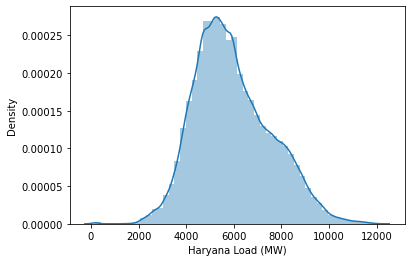

In [10]:
print(df["Haryana Load (MW)"].describe())

sns.distplot(df["Haryana Load (MW)"]);

stats.normaltest(df["Haryana Load (MW)"])



## Time Series Plot

In [11]:
df1=df.loc[:,['Date','Haryana Load (MW)']]
df1['Date'] = df['Date'].apply(lambda x: x.date())
df1['Date']=pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace=True);

<Figure size 1080x432 with 0 Axes>

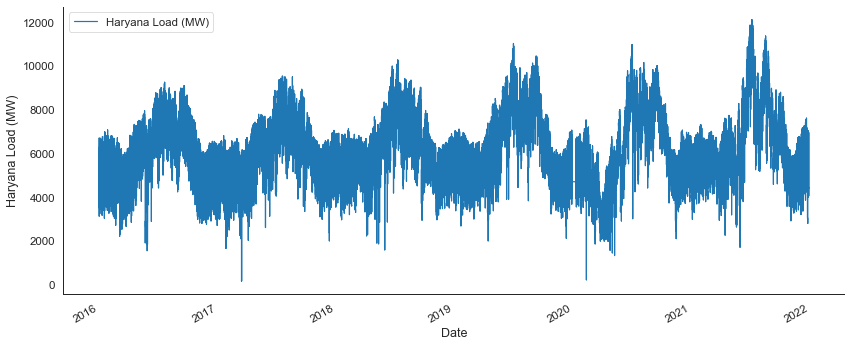

In [12]:
df2=df1[(df1.index>='2016-01-01') & (df1.index<'2021-12-31')]
a=plt.figure(figsize=(15,6))
sns.set_style("whitegrid", {'axes.grid' : False});
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
 

df2.plot(figsize=(12,5));
#plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.box(False)
plt.ylabel('Haryana Load (MW)')
plt.legend().set_visible(True)
plt.tight_layout()
sns.despine(top=True)
plt.show()

In [13]:
q = df["Haryana Load (MW)"].quantile(0.97)
dfq=df[df["Haryana Load (MW)"] < q]

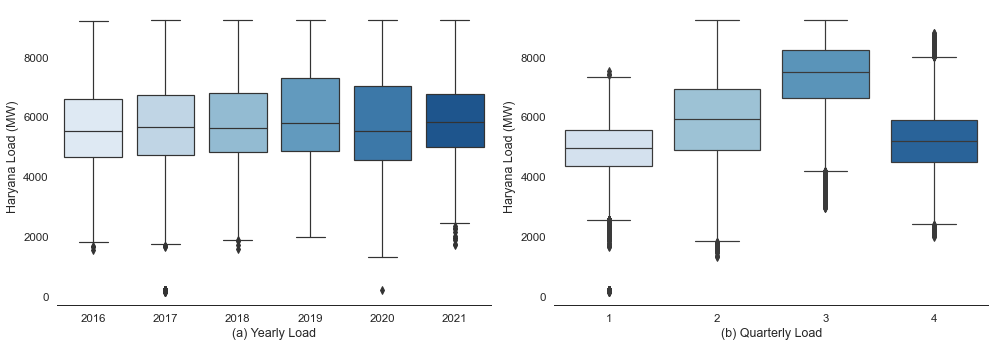

In [14]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
a=plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="year", y="Haryana Load (MW)", data=dfq, palette='Blues');
plt.xlabel('(a) Yearly Load')
sns.despine(left=True);
plt.tight_layout() 

plt.subplot(1,2,2)

sns.boxplot(x="quarter", y="Haryana Load (MW)", data=dfq, palette='Blues');
plt.xlabel('(b) Quarterly Load')
sns.despine(left=True);
plt.tight_layout() 


## Electricty Consumption Distribution

,count,mean,std,min,25%,50%,75%,max
Haryana Load (MW),210431.00,5949.40,1607.60,158.23,4782.01,5721.32,6987.20,12114.01


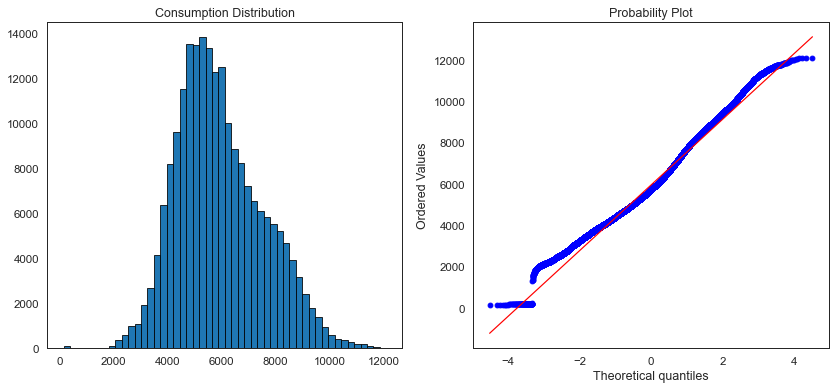

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Haryana Load (MW)'].hist(bins=50,edgecolor='black', grid=False)
plt.title('Consumption Distribution')

plt.subplot(1,2,2)
stats.probplot(df['Haryana Load (MW)'], plot=plt);
#print("Skewness: %f" % df['Consumption'].skew())
#print("Kurtosis: %f" % df['Consumption'].kurt())
df1.describe().transpose()

## Consumption by Year,  Month and Day

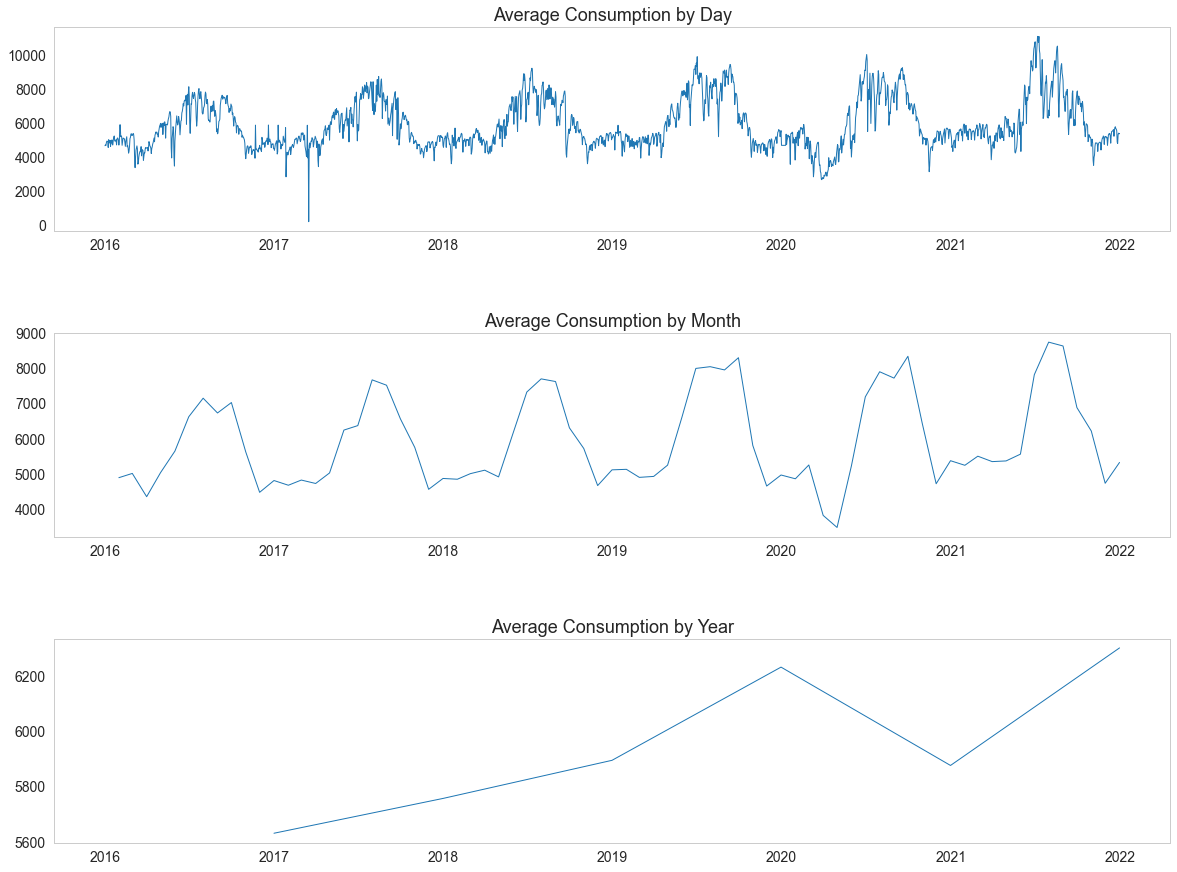

In [16]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(3,1,1)
ax1.plot(df1['Haryana Load (MW)'].resample('D').mean(),linewidth=1)
ax1.set_title('Average Consumption by Day', fontsize=18)
#ax1.set_ylabel('Average Consumption', fontsize=14)
#ax1.set_xlabel('Day of Crime', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(df1['Haryana Load (MW)'].resample('M').mean(),linewidth=1)
ax2.set_title('Average Consumption by Month', fontsize=18)
#ax2.set_ylabel('# of Crimes', fontsize=14)
#ax2.set_xlabel('Month of Crime', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3  = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(df1['Haryana Load (MW)'].resample('A').mean(),linewidth=1)
ax3.set_title('Average Consumption by Year', fontsize=18)
#ax3.set_ylabel('# of Crimes', fontsize=14)
#ax3.set_xlabel('Year of Crime', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)

## Consumption by Years (2016-2021)

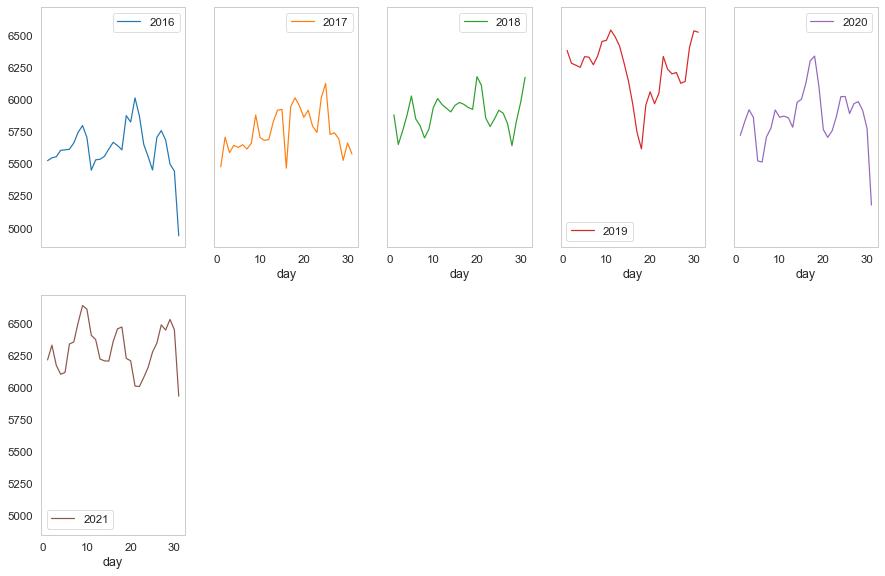

In [17]:
dfPivot = pd.pivot_table(df, values = "Haryana Load (MW)", 
                             columns = "year", index = "day")

dfPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True);

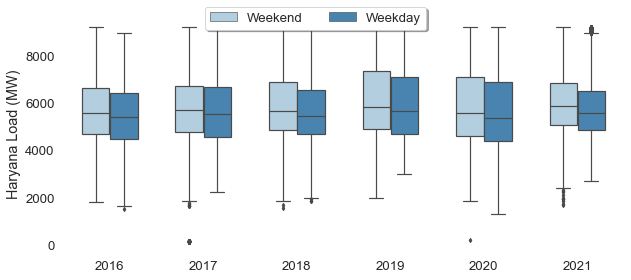

In [18]:
q = df["Haryana Load (MW)"].quantile(0.97)
dfq=df[df["Haryana Load (MW)"] < q]

dic={0:'Weekday',1:'Weekend'}
dfq['Day'] = dfq.weekday.map(dic)

a=plt.figure(figsize=(9,4))
sns.set_context("paper", font_scale=1.5)  
plt1=sns.boxplot('year','Haryana Load (MW)',hue='Day',width=0.6,fliersize=3,
                    data=dfq, palette='Blues');                                                                                                                                                                                                                                                                                                                                             
#plt.title('Box Plot of Consumption by Weekend/Weekday')    
a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.xlabel('')
plt.tight_layout()                                                                                                                  
plt.legend().set_visible(False)


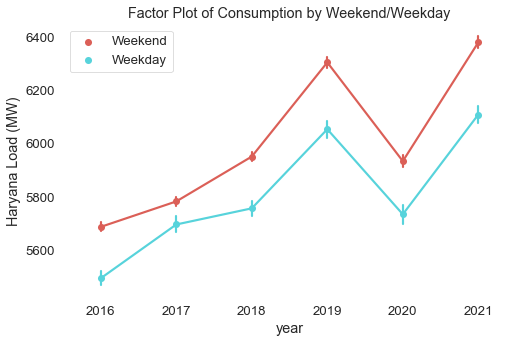

In [19]:
dic={0:'Weekday',1:'Weekend'}
df['Day'] = df.weekday.map(dic)

sns.set_context("paper", font_scale=1.5)  
plt1=sns.factorplot('year','Haryana Load (MW)',hue='Day',
                    data=df, size=5,palette='hls', aspect=1.5, legend=False);                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Consumption by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper left');

## Dickey-Fuller Test to Ceck Stationarity

In [20]:
df2=df1.resample('D').mean()

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
#remove Nan Values
df2.dropna(inplace=True)
#df2.head(10)   

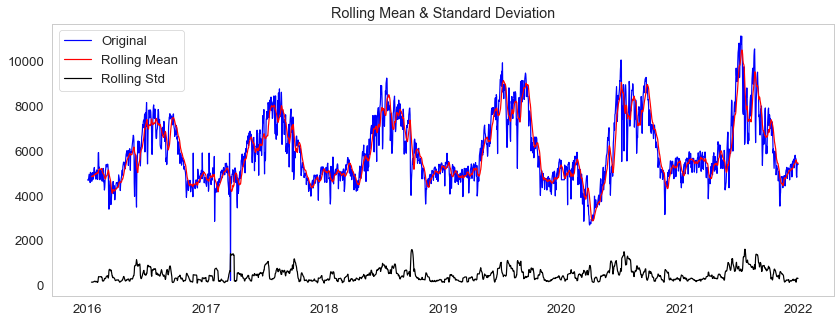

<Results of Dickey-Fuller Test>
Test Statistic                  -3.82
p-value                          0.00
#Lags Used                      21.00
Number of Observations Used   2170.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [21]:
test_stationarity(df2['Haryana Load (MW)'])

## Checking Autocorrelation

In [22]:
x= df['Haryana Load (MW)']
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range =(0 , 1))
x = np. array (x). reshape (( len(x), ))
x=np.log (x)
print (x.shape)#x is a 1 dimensional array with 157786 rows
x=x.reshape(-1 ,1)
print (x.shape)
x = scaler.fit_transform(x)
x=x.reshape (-1)
print (x.shape)
print(round(x.min(),2))
print(round(x.max(),2))
from statsmodels.tsa.stattools import pacf
x_pacf=pacf (x,nlags=20, method='ols')
print (x_pacf)

(210431,)
(210431, 1)
(210431,)
0.0
1.0
[ 1.00000000e+00  9.93015466e-01 -2.65968650e-01 -7.73457347e-02
 -8.52350587e-02 -6.02628163e-02  9.18014490e-04 -2.92116509e-03
  3.85312254e-02  7.90199420e-03  1.80710479e-02  1.86681876e-02
  2.28147151e-02  3.43763218e-02  2.50073846e-02  1.17071505e-02
  2.09908715e-02  2.10821217e-02  1.79879111e-02  1.13664187e-02
  1.57086922e-02]


## Log Transformation and First Difference

In [23]:
df2 = df1['Haryana Load (MW)'].resample('D').mean().to_frame()
tslog=np.log(df2)
tslog = tslog - tslog.shift(1)
tslog=tslog+10
tslog.dropna(inplace=True)
tslog[tslog['Haryana Load (MW)']<0].count()

Haryana Load (MW)    0
dtype: int64

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#df1diff.head()
tslog.dropna(inplace=True)
test_stationarity(tslog["Haryana Load (MW)"])

<Results of Dickey-Fuller Test>
Test Statistic                 -12.59
p-value                          0.00
#Lags Used                      20.00
Number of Observations Used   2170.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


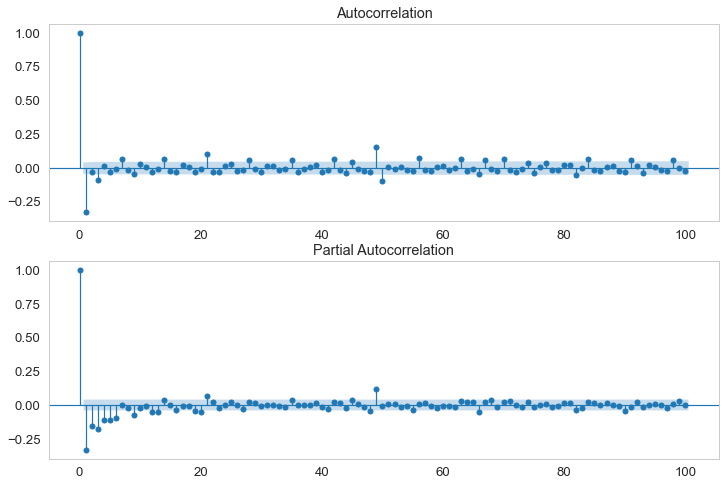

In [25]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tslog.iloc[13:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tslog.iloc[13:], lags=100, ax=ax2)

## Weather Data

In [26]:
dfw=pd.read_csv('Combined_Data_for_model_final_2.csv')
dfw.head()
print(dfw.shape)

(210431, 10)


In [27]:
print(dfw[dfw.duplicated()].count()['Date'])
dfw.drop_duplicates('Date', keep=False, inplace=True)
dfw.shape

0


(210431, 10)

In [28]:
list_df=[]
dfw["Date"]=pd.to_datetime(dfw["Date"])
dfw["windspeed"]=pd.to_numeric(dfw["windspeed"],errors="coerce")
#dfw=dfw[(dfw["windspeed"]<200) & (dfw["windspeed"]>0)]
dfw=dfw[(dfw["temp"]>-30) & (dfw["temp"]<70)]
dfw=dfw[(dfw["humidity"]>0) & (dfw["humidity"]<150)]
dfw=dfw[(dfw["dew"]>0) & (dfw["dew"]<50)]
dfw=dfw[(dfw["windspeed"]>0) & (dfw["windspeed"]<40)]

dfw=dfw[["Date","temp","humidity","windspeed", "dew", ]].set_index(["Date"])
for param in ["temp","humidity","windspeed", "dew"]:
    print(param)
    list_df.append(dfw[[param]].resample('15T').interpolate(method='linear'))
dfw=pd.concat(list_df,axis=1).reset_index()
dfw.set_index ('Date', inplace=True)
dfw.head()


temp
humidity
windspeed
dew


,temp,humidity,windspeed,dew
Date,,,,
2016-01-01 02:00:00,9.60,93.86,1.70,8.60
2016-01-01 02:15:00,9.60,93.86,1.70,8.60
2016-01-01 02:30:00,9.60,93.86,1.70,8.60
2016-01-01 02:45:00,9.60,93.86,1.70,8.60
2016-01-01 03:00:00,9.00,87.29,5.40,7.00


In [29]:
df0=df.loc[:,['Date','Haryana Load (MW)','quarter', 'month','day','weekday']]
df0.set_index('Date', inplace=True)
df0.head(2)

,Haryana Load (MW),quarter,month,day,weekday
Date,,,,,
2016-01-01 00:15:00,4099.37,1,1,1,1
2016-01-01 00:30:00,3995.64,1,1,1,1


In [30]:
dfp=dfw.join(df0,how='inner')[['Haryana Load (MW)','quarter', 'month', 'day', 'weekday',"temp",'humidity','windspeed','dew']]

#dfp=dfp.resample('W', how=np.mean)
#df = df.rename(columns={'temperature': 'Temperature', 'humidity': 'Humidity', 'wind_speed':'Wind Speed'})

dfp.columns = ['Haryana Load (MW)', 'Quarter', 'Month', 'Day', 'Weekday', 'Temperature','Humidity','Wind_Speed','Dew']
dfp.head()

,Haryana Load (MW),Quarter,Month,Day,Weekday,Temperature,Humidity,Wind_Speed,Dew
Date,,,,,,,,,
2016-01-01 02:00:00,3598.56,1,1,1,1,9.60,93.86,1.70,8.60
2016-01-01 02:15:00,3581.37,1,1,1,1,9.60,93.86,1.70,8.60
2016-01-01 02:30:00,3569.62,1,1,1,1,9.60,93.86,1.70,8.60
2016-01-01 02:45:00,3602.53,1,1,1,1,9.60,93.86,1.70,8.60
2016-01-01 03:00:00,3631.78,1,1,1,1,9.00,87.29,5.40,7.00


## Week Resolution Scatter Plot

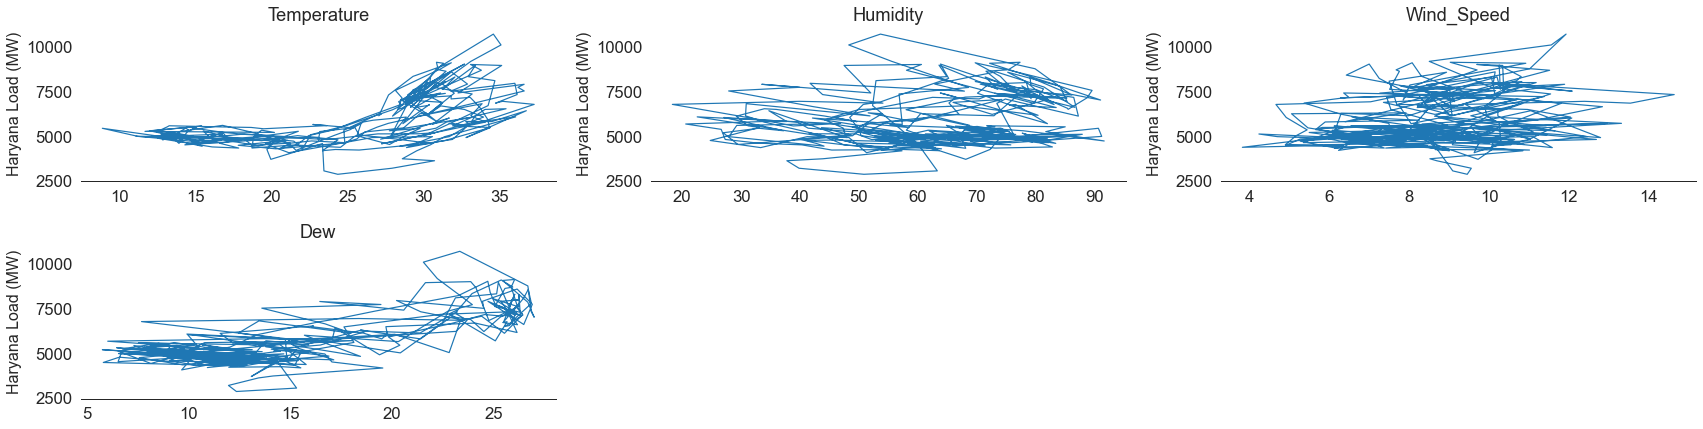

In [31]:
dfweek=dfp.resample('W').mean()

#Correlation of features with the target Price
Consumption=dfweek['Haryana Load (MW)']
features=dfweek.loc[:,['Temperature','Humidity','Wind_Speed', 'Dew']]

sns.set_style('white')
sns.set_context("paper", font_scale=1.9)  
plt.figure(figsize=(24, 9)) #Figure Size with subplots
for i, col in enumerate(features.columns):
    plt.subplot(3, 3, i+1) #Subplot of 1 row and 03 columns
    plt.plot(features[col].astype(float), dfweek['Haryana Load (MW)'])
    plt.title(col)
    sns.despine(left=True)
    plt.ylabel('Haryana Load (MW)',fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)


## Checking Correlations

In [32]:
dfc=dfp[['Haryana Load (MW)','Temperature','Humidity','Wind_Speed','Dew']]
for obs in range(1,10):
     dfc["T_" + str(obs)] = dfp['Haryana Load (MW)'].shift(obs)
dfc.fillna(0.00,inplace=True)
dfc.head()  

,Haryana Load (MW),Temperature,Humidity,Wind_Speed,Dew,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9
Date,,,,,,,,,,,,,,
2016-01-01 02:00:00,3598.56,9.60,93.86,1.70,8.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2016-01-01 02:15:00,3581.37,9.60,93.86,1.70,8.60,3598.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2016-01-01 02:30:00,3569.62,9.60,93.86,1.70,8.60,3581.37,3598.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2016-01-01 02:45:00,3602.53,9.60,93.86,1.70,8.60,3569.62,3581.37,3598.56,0.00,0.00,0.00,0.00,0.00,0.00
2016-01-01 03:00:00,3631.78,9.00,87.29,5.40,7.00,3602.53,3569.62,3581.37,3598.56,0.00,0.00,0.00,0.00,0.00


## Correlation Matrix

In [33]:
a=pd.DataFrame(dfc.corr())
a;

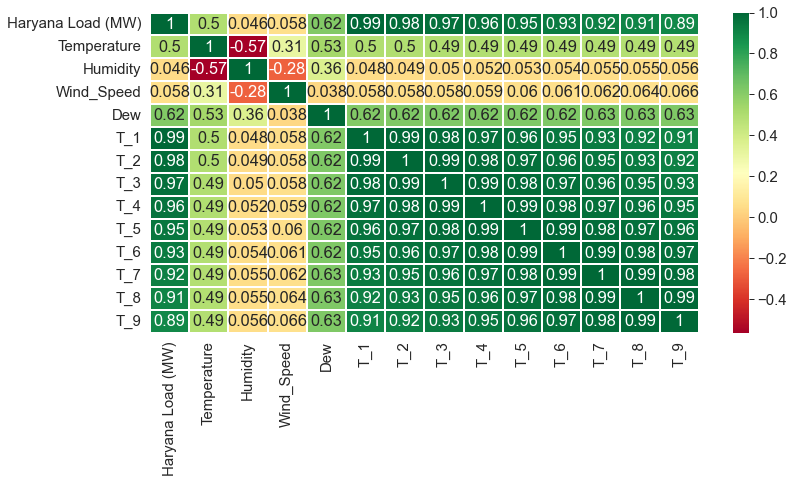

In [34]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.7)  
plt.figure(figsize=(12,7))
sns.heatmap(dfc.corr(), annot=True, cmap='RdYlGn', linewidths=0.1)
plt.tight_layout()

In [49]:
from pandas import ExcelWriter
writer = ExcelWriter('LSTM.xlsx')
dfp.to_excel(writer,'Sheet1')
writer.save()

In [50]:
df.head(5)

,Date,Haryana Load (MW),year,quarter,month,day,weekday,Day
0,2016-01-01 00:15:00,4099.37,2016,1,1,1,1,Weekend
1,2016-01-01 00:30:00,3995.64,2016,1,1,1,1,Weekend
2,2016-01-01 00:45:00,3954.80,2016,1,1,1,1,Weekend
3,2016-01-01 01:00:00,3904.93,2016,1,1,1,1,Weekend
4,2016-01-01 01:15:00,3654.68,2016,1,1,1,1,Weekend


## Appending 30 Previous Time Lags

In [51]:
for obs in range(1,30):
    dfp["T_" + str(obs)] = dfp['Haryana Load (MW)'].shift(obs)
    
#df.fillna(0.00,inplace=True)
dfp.head(5)  

,Haryana Load (MW),Quarter,Month,Day,Weekday,Temperature,Humidity,Wind_Speed,Dew,T_1,...,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27,T_28,T_29
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 09:15:00,4525.03,1,1,1,1,13.00,84.26,3.90,10.40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 09:30:00,4830.34,1,1,1,1,13.00,84.26,3.90,10.40,4525.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 09:45:00,4786.29,1,1,1,1,13.00,84.26,3.90,10.40,4830.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 10:00:00,4703.09,1,1,1,1,16.00,67.56,5.40,10.00,4786.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 10:15:00,4720.42,1,1,1,1,16.00,67.56,5.40,10.00,4703.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
dfp=dfp.dropna()
dfp.shape

(210354, 38)

## Time Lags Only

In [56]:
# for obs in range(1,2881):
#     df1["T_" + str(obs)] = df1["Haryana Load (MW)"].shift(obs)
    
# #df.fillna(0.00,inplace=True)
# df1.head(3)  

In [ ]:
# df1=df1.dropna()
# df1.shape

In [ ]:
moving_avg = tslog.rolling(12).mean()
plt.plot(tslog)
#plt.figure(figsize=(12,7))
plt.plot(moving_avg, color='red')
plt.figure(figsize=(12,7))
plt.show

## Min Max Scaling

In [42]:
df2=df.loc[:,['Date','Haryana Load (MW)']]
#df1['Time'] = df['Time'].apply(lambda x: x.date())
#df1['Time']=pd.to_datetime(df1['Time'])
df2.set_index('Date',inplace=True);


In [43]:
df2.shape

(210431, 1)

In [44]:
ma = df2.rolling(12).mean()
ma= ma.replace(0,np.NAN)
ma=ma.dropna(how='all',axis=0)
ma.head()

,Haryana Load (MW)
Date,
2016-01-01 03:00:00,3727.56
2016-01-01 03:15:00,3703.32
2016-01-01 03:30:00,3686.92
2016-01-01 03:45:00,3674.61
2016-01-01 04:00:00,3671.53


In [45]:
df2.isnull().sum()

Haryana Load (MW)    0
dtype: int64

In [46]:
df3=df2
df3.head()

,Haryana Load (MW)
Date,
2016-01-01 00:15:00,4099.37
2016-01-01 00:30:00,3995.64
2016-01-01 00:45:00,3954.80
2016-01-01 01:00:00,3904.93
2016-01-01 01:15:00,3654.68


In [47]:
# Extract time-lag features for 1 day, 2 day, 3 day, 5 day, 1 week, 2 week, and a month ago
for days_to_lag in [1, 2, 3, 5, 7, 14, 30]:
    df3['Haryana Load (MW)_lag_{}'.format(days_to_lag)] = df3['Haryana Load (MW)'].shift(days_to_lag)

In [48]:
df3.isnull().sum()

Haryana Load (MW)            0
Haryana Load (MW)_lag_1      1
Haryana Load (MW)_lag_2      2
Haryana Load (MW)_lag_3      3
Haryana Load (MW)_lag_5      5
Haryana Load (MW)_lag_7      7
Haryana Load (MW)_lag_14    14
Haryana Load (MW)_lag_30    30
dtype: int64

In [108]:
df3.dropna(inplace=True)
df3.shape

(210401, 8)

In [109]:
print(df2.shape)
print(df3.shape)

(210401, 8)
(210401, 8)


In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,2))
dfp[['Quarter','Month','Day','Temperature','Humidity','Wind_Speed','Dew',]] = scaler.fit_transform(dfp[['Quarter','Month','Day','Temperature','Humidity','Wind_Speed','Dew']]);


In [112]:
dfp.head(2)

,Haryana Load (MW),Quarter,Month,Day,Weekday,Temperature,Humidity,Wind_Speed,Dew,T_1,...,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27,T_28,T_29
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 09:15:00,4525.03,1.00,1.00,1.00,1,1.23,1.83,1.10,1.34,4340.82,...,4140.13,3867.99,3807.12,3798.82,3808.49,3631.78,3602.53,3569.62,3581.37,3598.56
2016-01-01 09:30:00,4830.34,1.00,1.00,1.00,1,1.23,1.83,1.10,1.34,4525.03,...,4376.91,4140.13,3867.99,3807.12,3798.82,3808.49,3631.78,3602.53,3569.62,3581.37


## Train Test Split

In [54]:
dfp.index.max()

Timestamp('2021-12-31 20:45:00')

In [55]:
# Define training and testing periods
train_start = '2016-01-01'
train_end = '2019-12-31'
test_start = '2020-01-01'
test_end = '2021-12-31'

In [58]:
X_train = dfp[train_start:train_end]
del X_train['Haryana Load (MW)']

y_train = dfp['Haryana Load (MW)'][train_start:train_end]

X_test = dfp[test_start:test_end]
del X_test['Haryana Load (MW)']

y_test = dfp['Haryana Load (MW)'][test_start:test_end]

In [59]:
print ('Number of observations in the Training set:', len(X_train))
print ('Percentage of data in Training set:', len(X_train)/len(dfp)*100)
print ('Number of observations in the Test set: ', len(X_test))
print ('Percentage of data in Test set:', len(X_test)/len(dfp)*100)


Number of observations in the Training set: 140190
Percentage of data in Training set: 66.64479876779143
Number of observations in the Test set:  70164
Percentage of data in Test set: 33.355201232208564


In [60]:
def MAPError(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((np.abs(y_true - y_pred)) / (y_true)) * 100

In [61]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error